# Scaling Numeric Data Exercises

In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import prepare
from wrangle import wrangle_telco
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
train, validate, test = prepare.split_my_data(df)

## Q1. Apply the scalers we talked about in this lesson to your data and visualize the results.

#### Standard Scaler

In [5]:
scaler_standard, train_standard, validate_standard, test_standard = prepare.standard_scaler(train, validate, test)

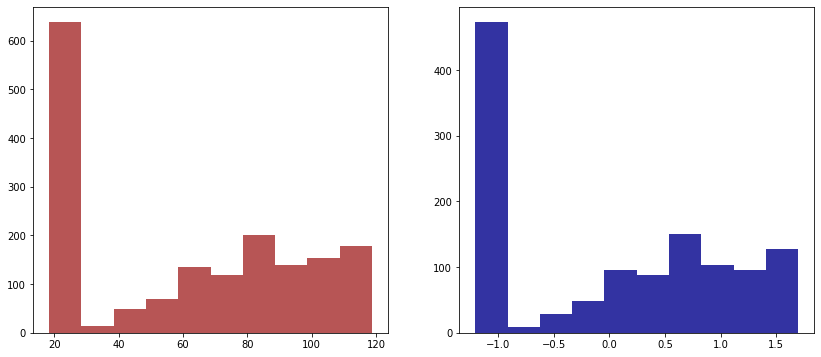

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_standard.monthly_charges, alpha = 0.8, color = 'darkblue')
plt.show()

#### Uniform Scaler

In [7]:
scaler_uniform, train_uniform, validate_uniform, test_uniform = prepare.uniform_scaler(train, validate, test)

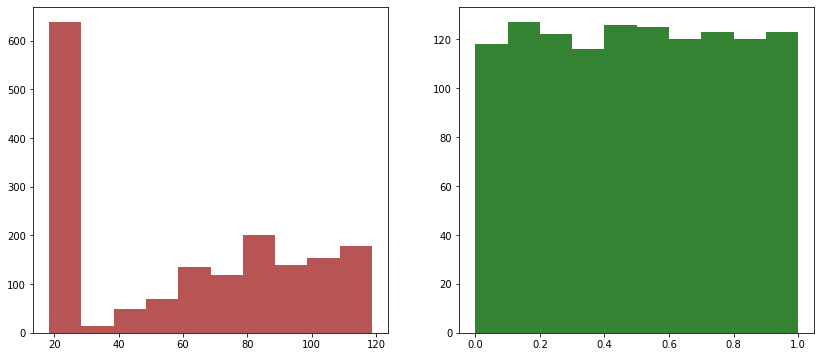

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_uniform.monthly_charges, alpha = 0.8, color = 'darkgreen')
plt.show()

#### Gaussian Scaler

In [9]:
scaler_gaussian, train_gaussian, validate_gaussian, test_gaussian = prepare.gaussian_scaler(train, validate, test)

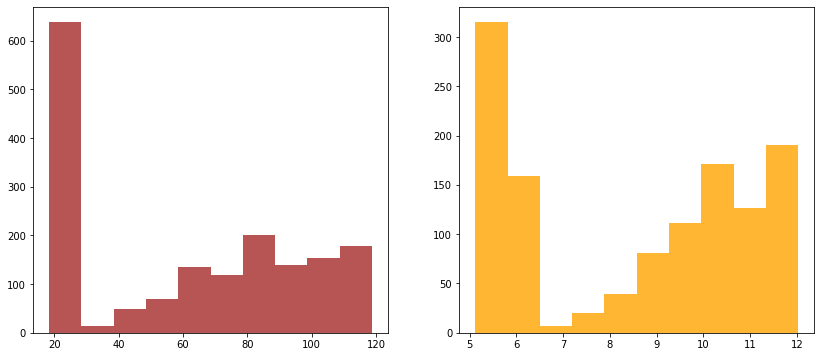

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_gaussian.monthly_charges, alpha = 0.8, color = 'orange')
plt.show()

#### Min-Max Scaler

In [11]:
scaler_min_max, train_min_max, validate_min_max, test_min_max = prepare.min_max_scaler(train, validate, test)

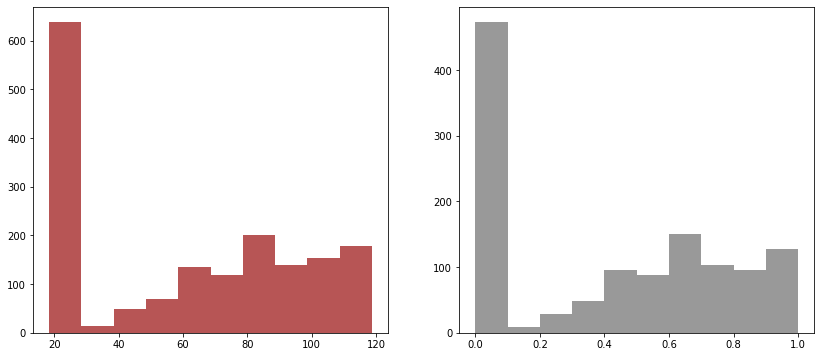

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_min_max.monthly_charges, alpha = 0.8, color = 'grey')
plt.show()

#### Iqr-Robust Scaler

In [13]:
scaler_iqr_robust, train_iqr_robust, validate_iqr_robust, test_iqr_robust = prepare.iqr_robust_scaler(train, validate, test)

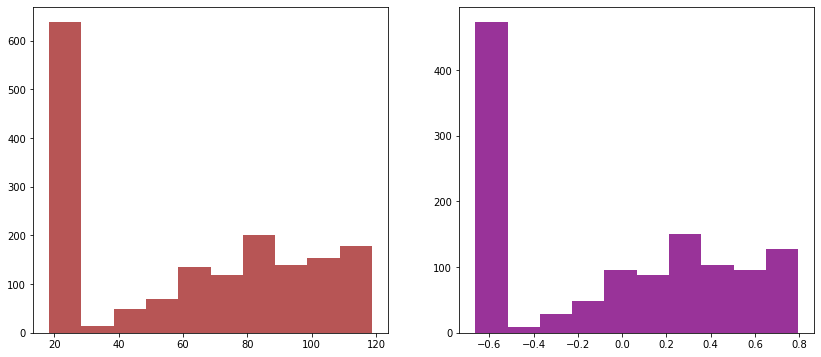

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_iqr_robust.monthly_charges, alpha = 0.8, color = 'purple')
plt.show()

## Q2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [15]:
df_compare = pd.DataFrame(train.monthly_charges)
df_compare['monthly_charges_scaled'] = train_standard.monthly_charges
df_compare['monthly_charges_unscaled'] = pd.DataFrame(scaler_standard.inverse_transform(train_standard), columns=train_standard.columns.values).set_index([train_standard.index.values]).monthly_charges
df_compare

,monthly_charges,monthly_charges_scaled,monthly_charges_unscaled
81,24.75,-1.019098,24.75
417,101.00,1.183803,101.00
754,89.90,0.863118,89.90
1605,69.20,0.265085,69.20
325,20.00,-1.156328,20.00
...,...,...,...
1615,19.75,-1.163551,19.75
1361,35.70,-0.702747,35.70
1607,64.75,0.136522,64.75
1133,80.30,0.585769,80.30


## Q3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [16]:
quantile_normal_scaler, train_quantile_normal, validate_quantile_normal, test_quantile_normal = prepare.quantile_scaler_normal(train, validate, test)

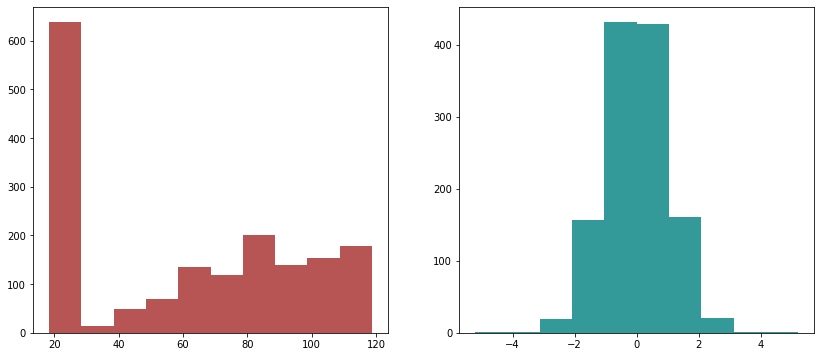

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_quantile_normal.monthly_charges, alpha = 0.8, color = 'teal')
plt.show()

## Q4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [18]:
quantile_scaler, train_quantile, validate_quantile, test_quantile = prepare.quantile_scaler(train, validate, test)

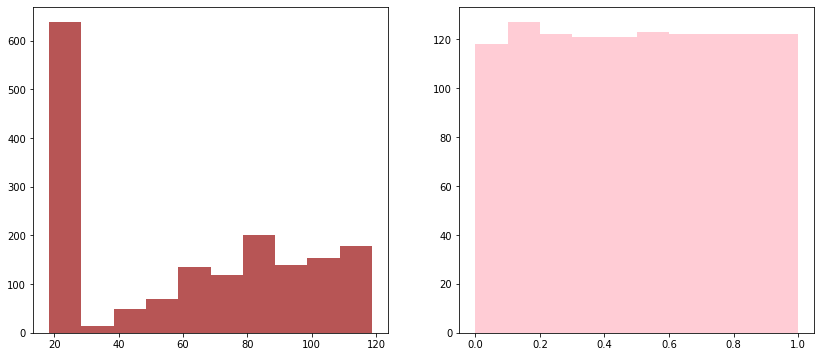

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(df.monthly_charges, alpha = 0.8, color = 'brown')
plt.subplot(1, 2, 2)
plt.hist(train_quantile.monthly_charges, alpha = 0.8, color = 'pink')
plt.show()

## Q5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [20]:
scaler_standard, train_standard, validate_standard, test_standard = prepare.standard_scaler(train, validate, test)

In [21]:
train_standard.head()

,monthly_charges,tenure,total_charges
81,-1.019098,0.462212,-0.755498
417,1.183803,0.738876,1.346878
754,0.863118,0.794209,1.100895
1605,0.265085,0.738876,0.480486
325,-1.156328,-2.691767,-1.371484


In [22]:
validate_standard.head()

,monthly_charges,tenure,total_charges
1671,-0.198608,-1.972438,-0.963724
1043,1.433705,0.849542,1.658003
1627,-1.159217,-0.423116,-1.026595
1436,1.589714,0.849542,1.863430
669,0.038294,0.185547,0.047456


In [23]:
test_standard.head()

,monthly_charges,tenure,total_charges
252,-1.151995,-2.581101,-1.340479
632,0.448539,0.351546,0.416088
472,-1.169329,0.738876,-0.854561
1029,1.146245,0.351546,1.051276
910,0.634883,0.794209,0.921874
